<a href="https://colab.research.google.com/github/lawrenceN/ASPBaseApp/blob/master/CS__Practical__DigitalImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset


In [ ]:
from tensorflow.keras.datasets import mnist


In [ ]:
#Loads the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#Display the number of samples in the x_train, x_test, y_train and y_test
print("Initial shape of dimensions of x_train", str(x_train.shape) + "\n")
print("Number of samples in our training data: " + str(len(x_train)))
print("Number of labels in our training data: " + str(len(y_train)))
print("Number of samples in our test data: " + str(len(x_test)))
print("Number of labels in our test data: " + str(len(y_test)) + "\n")

print("Dimensions of the x_train: " + str(x_train[0].shape))
print("Labels in y_train: " + str(y_train.shape))

print("Dimensions of the x_train: " + str(x_test[0].shape))
print("Labels in y_train: " + str(y_test.shape))

Initial shape of dimensions of x_train (60000, 28, 28)

Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of the x_train: (28, 28)
Labels in y_train: (60000,)
Dimensions of the x_train: (28, 28)
Labels in y_train: (10000,)


Take a look at the images

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


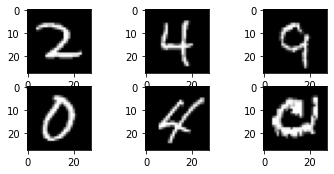

In [ ]:
#Plot 6 images in subplots
#set the colormap to grey since our image data is in greyscale
plt.subplot(331)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

In [ ]:
#store the number of rows and columns
img_rows = x_train[0].shape[0]
img_columns = x_train[0].shape[1]

#get the data into the right shape for keras
#add 4th dimension to the tensor
x_train = x_train.reshape(x_train.shape[0], img_rows, img_columns, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_columns, 1)

In [ ]:
#store the shape of a single image for future use
input_shape= (img_rows, img_columns, 1)

#change the image type to float32 from unsignedint
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalzie the data by changing the range from 0-255 to 0-1
x_train /=255.0
x_test /=255.0

print("X_train shape ", x_train.shape)
print(x_train.shape[0], "x_train samples")
print(x_test.shape[0], "x_test samples")


X_train shape  (60000, 28, 28, 1)
60000 x_train samples
10000 x_test samples


In [ ]:
from tensorflow.keras.utils import to_categorical
#one-hot encode for outputs
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)

#count the number of columns in our hot coded matrix
print('Number of classes: '+str(y_test.shape[1]))
num_classes=y_test.shape[1]

Number of classes: 10


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

#create a model
model=Sequential()

#First Convolutional layer, filter size 32, which reduces our layer size to 28*28*32
#we use ReLU activation and specify our input shape which is 28*28*1
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))

#second Convolutional layer, filter size 64, which reduces layer size to 24*24*64
model.add(Conv2D(64, (3,3),activation='relu'))

#we use maxpooling with kernel size of 2*2, which reduces size to 12*12*64
model.add(MaxPooling2D(pool_size=(2,2)))

#Dropout P setting as 0.25 to reduce overfitting
model.add(Dropout(0.25))

#We then flatten our tensor object before input into our dense layer
#A flatten operation on a tensor reshapes the tensor to have a shape that is
#equal to the number of elements combined in tensor
#in our CNN it goes from  12*12*64 to 9216*1
model.add(Flatten())

#We use another dropout layer
model.add(Dropout(0.5))

#We create fully connected/Dense layer with an output of each class (10)
model.add(Dense(num_classes, activation='softmax'))

#we compile our model, this creates an object that stores the model. We set the 
#Optimizer to use stochastic Gradient Descent (learning rate of 0.01)
#We set the loss function to be categorical_crossentropy as its suitable for
#multiclass problems. And finally the  metrics (to judge the performance of the model) we use accuracy
model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics=['accuracy'])

#the summary function can be used to display the model layers and parameters
print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f20916bbc50>>


In [ ]:
batch_size=32
epochs=10

#store the results for later plotting
#in our fit function we specify  our dataset (x_train and y_train)
#batch size (typically 16 to 128 -- RAM). The number of epochs (10 to 100)
#validation dataset (x_test, y_test)
#verbose = 1, setting the  training to output performance metrics every epoch

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

#We then obtain the accuracy score
score =model.evaluate(x_test, y_test, verbose=0)
print("test loss: ", score[0])
print("Test accuracy", score[1])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5516 - accuracy: 0.8327 - val_loss: 0.2627 - val_accuracy: 0.9264
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2542 - accuracy: 0.9252 - val_loss: 0.1405 - val_accuracy: 0.9627
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1625 - accuracy: 0.9527 - val_loss: 0.0968 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1288 - accuracy: 0.9618 - val_loss: 0.0761 - val_accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1099 - accuracy: 0.9675 - val_loss: 0.0676 - val_accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0983 - accuracy: 0.9701 - val_loss: 0.0612 - val_accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0894 - accuracy: 0.9724 - val_loss: 0.0555 - val_accuracy:

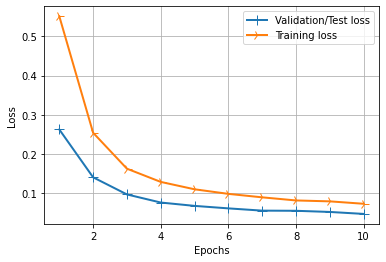

In [ ]:
#Plotting the loss charts
#Use the history object to get our svaed performace results
history_dict=history.history

#extract the loss and the validation losses
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

#get the number of epochs and create an array up to that number using range()
epochs=range(1, len(loss_values) +1)

#Plot line charts for both validation and loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test loss')
line2 = plt.plot(epochs, loss_values, label='Training loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

Plot of the Accuracy

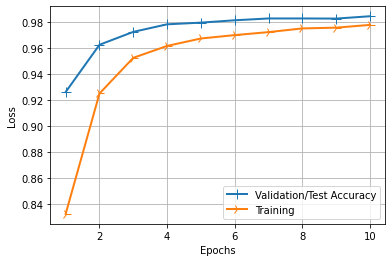

In [ ]:
#Plotting the accuracy chart
import matplotlib.pyplot as plt

#Use the history object to get our svaed performace results
history_dict=history.history

#extract the loss and the validation losses
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']

#get the number of epochs and create an array up to that number using range()
epochs=range(1, len(acc_values) +1)

#Plot line charts for both validation and loss
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#saving the model
model.save('mnist_simple_cnn_10_Epochs.h5')
print('model is saved')

model is saved


In [ ]:
from tensorflow.keras.models import load_model
classifier=load_model('mnist_simple_cnn_10_Epochs.h5')

5
2
5
9
9


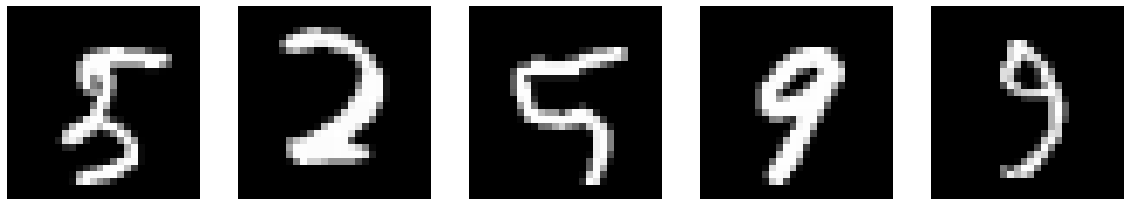

In [ ]:
import numpy as np
figure=plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_idx=np.random.randint(0,len(x_test))
  plt.imshow(x_test[random_idx,:,:,0],cmap='gray')
  plt.axis('off')
  print(np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,28,28,1)), axis=1),axis=0))

**Visualitazion of the Convolutional Neural Network**

Objective: Load trained CNN and understand what they "See" or learn, this well help in better understanding how they work.

Workflow:
1. Load dataset from milestone 1

2. Analyze the model's perfomance by viewing Confusion matrix and Classification Report. Aim at identifying weaknesses of the model.
Look at individual perfomance of each class of the CNN and see cases where it has trouble classifying the data correctly.

3. Identify all samples wrongly classified by the CNN and display the results. Think  why the model got it wrong.

4. Extract our layer outputs and create our activation model. So that we can visualize the activation of each layer. Give model some input and see how it deals with it.

5. Display output shape of the first activation layer and compare it with the output layer shape that can be seen from the model summary.

6. Show the output of the activation map of the first convolution layer and compare it with the output layer shape that can be seen from the model summary.

7. Display all the activations for the first 3 layers of the model.


Output: Display of the classification report and confusion matrix. A display of the sample data that is wrongly classified. We then display the activation layer for various CNN layers.


In [ ]:
#Reload the data
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
#Load datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
model=load_model('mnist_simple_cnn_10_Epochs.h5')

In [ ]:
#Number of rows and cols
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]

In [ ]:
#get data in the right shape for keras
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [ ]:
#store the shape of a single image
input_shape=(img_rows,img_cols,1)

#Change the image type to float32 data type
x_test=x_test.astype('float32')

#Normalize the data by changing the ranges from 0-255
x_test/=255.0
y_test=to_categorical(y_test)
print(x_test.shape[0],'test samples')

10000 test samples


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred=model.predict_classes(x_test)

print(classification_report(np.argmax(y_test,axis=1),y_pred))
print(confusion_matrix(np.argmax(y_test,axis=1),y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg    

In [ ]:
#Getting misclassified data

import cv2
import numpy as np
from tensorflow.keras.datasets import mnist

#Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
#use numpy to create an array to store a value of 1 when a misclassification occurs

result=np.absolute(y_test -y_pred)
result_indices=np.nonzero(result>0)
                          
#display the indices of the missclassificiiton
print('Indices of missclassified data are: \n\n'+ str(result_indices))

Indices of missclassified data are: 

(array([ 247,  259,  321,  340,  445,  449,  582,  659,  684,  717,  720,
        726,  740,  839,  844,  846,  882,  947,  965, 1014, 1039, 1112,
       1182, 1226, 1232, 1242, 1247, 1260, 1319, 1326, 1393, 1414, 1500,
       1522, 1530, 1621, 1681, 1709, 1717, 1754, 1878, 1901, 1955, 2016,
       2035, 2043, 2098, 2109, 2118, 2129, 2130, 2135, 2189, 2266, 2272,
       2293, 2387, 2406, 2425, 2447, 2454, 2488, 2607, 2654, 2780, 2896,
       2921, 2939, 2995, 3030, 3060, 3073, 3206, 3289, 3422, 3503, 3520,
       3550, 3559, 3597, 3726, 3751, 3767, 3808, 3853, 3906, 3941, 4065,
       4075, 4078, 4102, 4163, 4176, 4224, 4238, 4248, 4256, 4500, 4536,
       4571, 4575, 4578, 4601, 4639, 4731, 4740, 4761, 4783, 4807, 4874,
       4956, 5246, 5600, 5634, 5642, 5734, 5749, 5887, 5888, 5937, 5955,
       5973, 6091, 6505, 6555, 6571, 6572, 6576, 6597, 6625, 6651, 6783,
       6847, 7432, 7434, 8059, 8094, 8183, 8408, 9009, 9015, 9019, 9024,
       9638,

In [ ]:
#Reload the dataset

#Number of rows and cols
img_rows=x_train[0].shape[0]
img_columns=x_train[0].shape[1]


x_test = x_test.reshape(x_test.shape[0], img_rows, img_columns, 1)

#store the shape of a single image
input_shape = (img_rows,img_columns,1)

#change image type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize the data by changing the range
x_test /= 255.0
y_test = to_categorical(y_test)
print(x_test.shape[0], 'test samples')

10000 test samples


Display misclassified item

2	0	7	3	0	

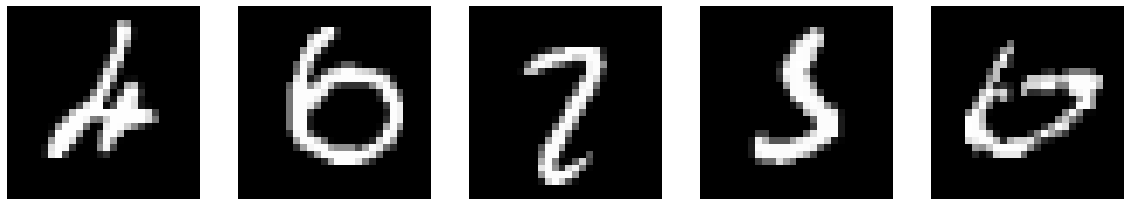

In [ ]:
import matplotlib.pyplot as plt

figure= plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  index=result_indices[0][i]
  plt.imshow(x_test[index,:,:,0],cmap='gray')
  plt.axis('off')
  prediction=np.squeeze(np.argmax(model.predict(x_test[index].reshape(1,28,28,1)),axis=1),axis=0)
  print(prediction, end='\t')

# Viewing the activation maps of the CNN

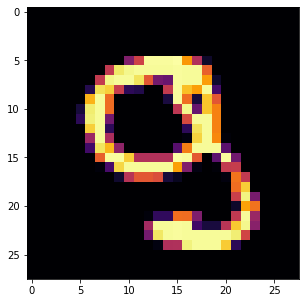

In [ ]:
from tensorflow.keras.models import Model

#Extract the outputs of the top 7 layers
layer_outputs=[layer.output for layer in model.layers[:7]]

#create a model to return those outputs given the model's input
activation_model = Model(inputs=model.input,outputs= layer_outputs)

#display the test image of the activation model
img_tensor = x_test[151].reshape(1,28,28,1)
figure1 = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap='inferno')
plt.axis='off'

TypeError: ignored

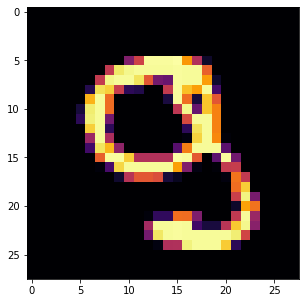

In [ ]:
import matplotlib.pyplot as plt

img_tensor=x_test[151].reshape(1,28,28,1)
fig=plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap='inferno')
plt.axis('off')

# Running the model in predict mode to get the activation layer

When an image is fed to the model it returns the values of the layer activations im the original model.

In [ ]:
activations=activation_model.predict(img_tensor)
print('Number of layer activation:'+ str(len(activations)) )

Number of layer activation:7


In [ ]:
#activation of the first convolution layer for the input
first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                9

Output of the first activation layer can be seen to be of the same shape as the output of the first Convolution layer.
We then plot the 4th conv channel/filter of the activation of the 1st layer of the original model

[link text](https://)

# The output of the 4th conv filter in the 1st conv layer

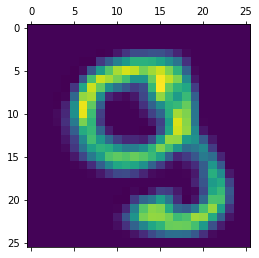

In [ ]:
plt.matshow(first_layer_activation[0,:,:,3],cmap='viridis')

# A function that displays the activations of specific layers

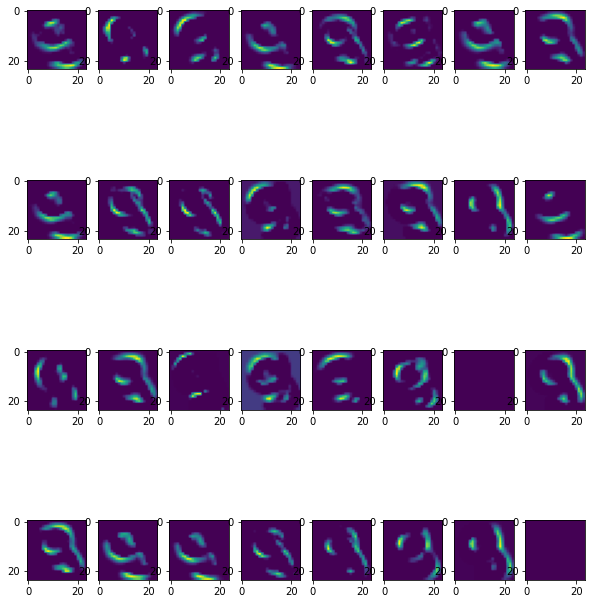

In [ ]:
def display_activations(activations,col_size,row_size,act_index):
  activation = activations[act_index]
  activation_index = 0
  fig,ax = plt.subplots(row_size,col_size, figsize=(row_size*2.5,col_size*1.5))
  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(activation[0,:,:,activation_index],cmap = 'viridis')
      activation_index += 1

display_activations(activations,8,4,1)

#Part 3:Transfer Learning: Understanding Transfer of Learning

Objective: Use Transfer Learning to improve accuracy on the CIFAR10 dataset.
Purpose: To help experience using pre-trained models.

**Workflow**
1.Load the CIFAR10 dataset (keras dataset) and train a Deeper CNN with various configurations.

2. Train this CNN for 10 Epochs or more using a Batch Size/ of 32 (batch size does not matter significantly as this depends on RAM size)
-Examine the perfomance metrics of trained CNN. The accuracy after 10 Epochs should be between 60 and 65% on the test data.
How we can perfom better on this.

3. See what our CNN is capable of by testing the model on some of the Test images used in part 1. How would you compare this classification perfomance to a human.

4. The model created could be dissapointing, we then use the Transfer learning to significantly improve it. (Load the weight of a pre-trained CNN such as VGG16)- to import that model: from tensorflow.keras.applications import vgg16 as vgg.

5. Do not include top layer when loading,, we are using this model to apply the concept of Transfer Learning- the function *vgg.VGG16(weights='imagenet', include_top=False,input_shape=(48,48,3))*

6. Extract the last layer from the 3rd block of the VGG16 model. We will be usiong the VGG model uptpp *block3_pool*

7. Add the classification layers for the CIFAR10 classed on top of it.

8. Freeze all layers in the pretrained VGG16 model since we will be reusing them and compile the merged model. Iterare through out base_model.layers and set the trainable parameter to be false by using layer.trainable=false

9. Keras data generator loading the image data.

10. Train the model and atleast 5 (10 is best) epochs and note the improvement.

11. Visualize the filters of the pre-trained VGG16 model- Reload the VGG16 model, extract the convolution layers since we want the filters and biased values of these. We will inspect the bias and weights usinbg 3rd convlayer using get_wights(). ==a good idea of what filters and biases are.


12. 12. Plot the first 6 conv filters- First normalixe the filter values (0-1) --get filters using f=filters[:,:,:,i]. Plot and visualixe it using plt.imshow(f[f:,:,:,j], cmap='gray')

13. Visulaize the features map of the VGG16 by running an input image (Create your own image) through the model. --redefine the model to output right after the 1st hidden layer using model=Model(input=model.inout,outputs=model.layers[1].output.
Using the inbuilt keras preprocessing functions load_img and img_to_img along the numpy's expand_dims and keras VGG16 funtion from tensorflow.keras.applictions.vgg16 import preprocess_input

14. plot these features maps for the output of the 5 convolution blocks indexed as [2,5,9,13,17]

# Training model for CIFAR10 using Deeper CNN

In [ ]:
from __future__ import print_function
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import os

In [ ]:
batch_size=32
num_classes=10
epochs=10


In [ ]:
#load the CIFAR10 dataset

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#Display data shape/dimesions
print('x_train shape',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

x_train shape (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#Format the trainging data by normalizing and changing data type
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
#one hot encode outputs
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

In [ ]:
model=Sequential()
#Padding = 'same' results in padding the input such that
#the output has the same length as the original input
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
 
#model build
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

# Training the model

In [ ]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True,verbose=1)
model.save('cifar_simple_cnn_2.h5')

Epoch 1/10
1563/1563 [==============================] - 283s 181ms/step - loss: 2.0836 - accuracy: 0.2260 - val_loss: 1.8204 - val_accuracy: 0.3492
Epoch 2/10
1563/1563 [==============================] - 282s 181ms/step - loss: 1.7645 - accuracy: 0.3561 - val_loss: 1.5682 - val_accuracy: 0.4250
Epoch 3/10
1563/1563 [==============================] - 282s 180ms/step - loss: 1.5725 - accuracy: 0.4274 - val_loss: 1.5044 - val_accuracy: 0.4543
Epoch 4/10
1563/1563 [==============================] - 298s 191ms/step - loss: 1.4485 - accuracy: 0.4729 - val_loss: 1.3173 - val_accuracy: 0.5333
Epoch 5/10
1563/1563 [==============================] - 284s 182ms/step - loss: 1.3611 - accuracy: 0.5101 - val_loss: 1.2445 - val_accuracy: 0.5498
Epoch 6/10
1563/1563 [==============================] - 289s 185ms/step - loss: 1.2864 - accuracy: 0.5400 - val_loss: 1.2631 - val_accuracy: 0.5604
Epoch 7/10
1563/1563 [==============================] - 287s 184ms/step - loss: 1.2277 - accuracy: 0.5614 - val_

In [ ]:
#Evaluate perfomance of trained model
scores=model.evaluate(x_test,y_test,verbose=1)
print('Test loss', scores[0])
print('Test accuracy', scores[1])

313/313 [==============================] - 15s 47ms/step - loss: 1.0512 - accuracy: 0.6296
Test loss 1.0511783361434937
Test accuracy 0.6295999884605408


# Test on some of the Test Images

In [ ]:
#create function to get class label
def getName(label,class_labels):
  return class_labels.get(int(label))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
class_labels={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}


In [ ]:
class_labels

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

cat	airplane	truck	ship	automobile	

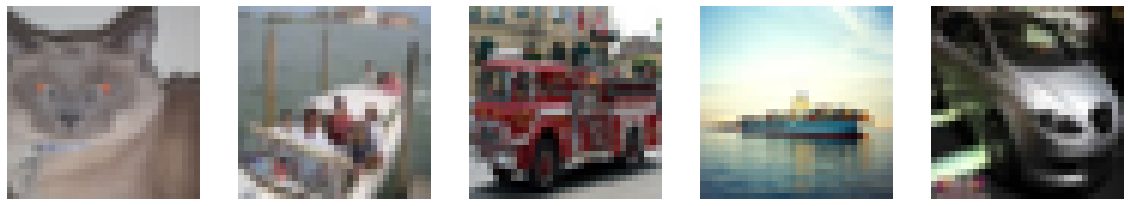

In [ ]:
figure=plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_idx=np.random.randint(0,len(x_test))
  plt.imshow(x_test[random_idx])
  plt.axis('off')
  label=np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,32,32,3)),axis=1),axis=0)
  print(getName(label,class_labels), end='\t')

# Now lets use transfer learning to get better accuracy

---



In [ ]:
#Perfom the imports
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Model
from tensorflow.keras.applications import vgg16 as vgg
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#define some parameters
BATCH_SIZE=32
EPOCHS=5
NUM_CLASSES=10
LEARNING_RATE=1E-4 
MOMENTUM=0.9

#IMPORT  scipy yo resize our images quickly
import scipy.misc
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=np.array([cv2.resize(x,(48,48), interpolation=cv2.INTER_AREA) for x in x_train])
x_test=np.array([cv2.resize(x,(48,48), interpolation=cv2.INTER_AREA) for x in x_test])

In [ ]:
#perfom hot one encoding
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train, NUM_CLASSES)
y_test=to_categorical(y_test, NUM_CLASSES)

#Import the pre-trained model VGG16, but without the 'HEAD' Layer

In [ ]:
from tensorflow.keras.applications import vgg16 as vgg
base_model=vgg.VGG16(weights='imagenet',include_top=False, input_shape=(48,48,3))


58892288/58889256 [==============================] - 1s 0us/step


#Extract the last layer from the 3rd block of the VGG16 model

In [ ]:
last=base_model.get_layer('block3_pool').output

In [ ]:
last

<tf.Tensor 'block3_pool/MaxPool:0' shape=(None, 6, 6, 256) dtype=float32>

# Add classification layers on top of it


In [ ]:
#Add classification layers on top of it
#x is our model that we're putting  ontop part of our pre-trained model
x=GlobalAveragePooling2D()(last)
x=BatchNormalization()(x)
x=Dense(256,activation='relu')(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.5)(x)

#Make our top model
number_of_classes=10
top=Dense(number_of_classes,activation='softmax') (x)

#construct full model
model=Model(base_model.input,top)


# Freeze all layers in the model as we'll be reusing them

In [ ]:
#iterate through the base model to 'freeze' the layer so that we dont train them

for layer in base_model.layers:
  layer.trainable=False

# Compare merged model

In [ ]:
#compiling the merge
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

# Model Summary

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)      

# Setup to use the Data Generator Function

In [ ]:
train_datagen=ImageDataGenerator(rescale=1.0 /255,horizontal_flip=False)

In [ ]:
#Use our Data Generator to get our data
train_datagen.fit(x_train)
train_generator=train_datagen.flow(x_train,y_train,batch_size=BATCH_SIZE)
val_datagen=ImageDataGenerator(rescale=1.0/255, horizontal_flip=False)
val_datagen.fit(x_test)
val_generator=val_datagen.flow(x_test,y_test,batch_size=BATCH_SIZE)

# Training the model

In [ ]:
#We are ready to start training the model now
train_steps_per_epoch=x_train.shape[0] // BATCH_SIZE
val_steps_per_epoch=x_test.shape[0] // BATCH_SIZE
history=model.fit_generator(train_generator,steps_per_epoch=train_steps_per_epoch, validation_data=val_generator,validation_steps=val_steps_per_epoch, epochs=EPOCHS, verbose=1)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1562/1562 [==============================] - 13s 8ms/step - loss: 0.2318 - accuracy: 0.4681 - val_loss: 0.1745 - val_accuracy: 0.6235
Epoch 2/5
1562/1562 [==============================] - 12s 8ms/step - loss: 0.1805 - accuracy: 0.6079 - val_loss: 0.1532 - val_accuracy: 0.6699
Epoch 3/5
1562/1562 [==============================] - 12s 8ms/step - loss: 0.1635 - accuracy: 0.6476 - val_loss: 0.1423 - val_accuracy: 0.6927
Epoch 4/5
1562/1562 [==============================] - 12s 8ms/step - loss: 0.1537 - accuracy: 0.6714 - val_loss: 0.1358 - val_accuracy: 0.7072
Epoch 5/5
1562/1562 [==============================] - 12s 8ms/step - loss: 0.1460 - accuracy: 0.6883 - val_loss: 0.1312 - val_accuracy: 0.7152


with 5 EPOCHS our accuracy is ~ 72% compared to 62% with 10 Epochs. Furthermore using Transfer Learning for more EPOCHS allows us to attain even better accuracy than with previous model.  We therefore taking advantage of pre-trained model and training only the top layers, this allow us to take advantage of the pre-trained weights.  We need to check "What exactly do these leanred weights know?"

#  Visualizing the filters of the pre-trained VGG16 model

In [ ]:
from tensorflow.keras.applications import vgg16 as vgg16
model=vgg.VGG16(weights='imagenet', include_top=False)
# get the symbolic outputs of each 'key' layer (we give them unique names)
layer_dict=dict([(layer.name, layer) for layer in model.layers])

In [ ]:
layer_dict

{'block1_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f2326089b00>,
 'block1_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f232f0b82e8>,
 'block1_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f2257a132e8>,
 'block2_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f2257ab0dd8>,
 'block2_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f2257a20080>,
 'block2_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f2257a20780>,
 'block3_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f2257a20fd0>,
 'block3_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f2257a27dd8>,
 'block3_conv3': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f2257a2e160>,
 'block3_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f2257a2eac8>,
 'block4_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f2257a365f8>,
 'block4_conv

In [ ]:
#summarize the filter shapes

for layer in model.layers:
  # check for convolutional layer
  if 'conv' not in layer.name:
    continue
  #get filter weights
  filters, biases =layer.get_weights()
  print(layer.name,filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [ ]:
# retrieve the weights from the third hidden layer
filters,biases=model.layers[2].get_weights()

In [ ]:
filters

array([[[[ 1.66219279e-01,  1.42701820e-01, -4.02113283e-03, ...,
           6.18828237e-02, -1.74057148e-02, -3.00644431e-02],
         [ 9.46945231e-03,  3.87477316e-03,  5.08365929e-02, ...,
          -2.77981739e-02,  1.71373668e-03,  6.82722731e-03],
         [ 6.32681847e-02,  2.12877709e-02, -1.63465310e-02, ...,
           8.80054955e-04,  6.68104272e-03, -1.41139806e-03],
         ...,
         [ 3.47490981e-03,  8.47019628e-02, -4.07223180e-02, ...,
          -1.13523193e-02, -7.48998486e-03,  3.19077494e-03],
         [ 5.97234145e-02,  4.97663505e-02, -3.23118735e-03, ...,
           1.43114366e-02,  3.03175431e-02, -4.23925705e-02],
         [ 1.33459672e-01,  4.95484173e-02, -1.78808011e-02, ...,
           2.25385167e-02,  3.02020740e-02, -2.17075031e-02]],

        [[ 2.12007999e-01,  2.10127644e-02, -1.47626130e-02, ...,
           2.29580477e-02,  1.23102348e-02, -3.08422819e-02],
         [-2.62175221e-03,  7.42094172e-03,  6.74030930e-02, ...,
          -3.06594316e

In [ ]:
# the biases 
biases

array([-0.30912212,  0.36397225,  0.13737613,  0.07717966,  0.9052184 ,
        0.08885256,  0.10789118, -0.23106739, -0.6318097 ,  0.18161367,
       -0.33391494,  0.1961724 ,  0.43838617,  0.1938708 ,  0.10894354,
        0.10315038, -1.0271513 ,  0.05252688,  0.13118458,  0.22851577,
       -0.71377224,  0.2154155 , -0.6981962 ,  0.04061132,  0.13955347,
        0.28767544,  0.35358745,  0.3937295 ,  0.43452853, -0.48259264,
        0.02631121,  0.09220165,  0.05196398,  0.550705  ,  0.32368094,
        0.07263482, -0.17745508,  0.3761972 ,  0.39344102,  0.17673127,
       -0.15784228,  0.26051855,  0.08342359,  0.08603705, -0.09131282,
        0.22932515,  0.2998315 ,  0.13511261, -0.3835829 ,  0.10912544,
       -0.53432876,  0.4741787 , -0.0740848 ,  0.30046257,  0.12590808,
        0.16480374,  0.2403943 ,  0.23401979, -0.19334187,  0.01663565,
        0.27144948,  0.03385786,  0.06076292, -0.5825159 ], dtype=float32)

In [ ]:
#shape of the Conv filters
filters.shape

(3, 3, 64, 64)

In [ ]:
#shape of the biases 
biases.shape

(64,)

In [ ]:
#normalize the filters values to 0-1 so that we can visualize them
f_min, f_max=filters.min(),filters.max()
filters=(filters - f_min)/(f_max - f_min)

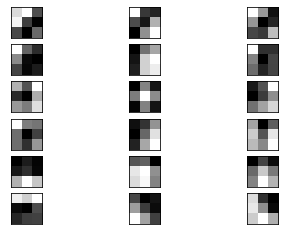

In [ ]:
#visualize the filters
import matplotlib.pyplot as plt
#plot the first few filters
n_filters, ix=6,1
for i in range(n_filters):
  #get the filter
  f=filters[:,:,:,i]
  #plot each channel separately
  for j in range(3):
    #specify subplot and turn on axis
    ax=plt.subplot(n_filters, 3, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    #plot filter channel in grayscale
    plt.imshow(f[:,:,j], cmap='gray')
    ix += 1
#show the figure
plt.show()


# Visualize the Activation feature Maps for the VGG16 by running an input image

In [ ]:
#plot the feature map of the first conv layer for given image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims

#load the mdoel
model=VGG16()


553467904/553467096 [==============================] - 6s 0us/step


In [ ]:
#create a model that will return these outputs, given the model input
#we redefine model to output right after the first hidden layer
model=Model(inputs=model.input, outputs=model.layers[1].output)

In [ ]:
#display the model summary
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#load the image required shape
img=load_img('sample_1.jpg', target_size=(224,224))

#convert the image to an array
img=img_to_array(img)

#expand dimensions so that it represents a single sample
img=expand_dims(img, axis=0)
#prepare the image (e.g scale the pixel values for the vgg)
img=preprocess_input(img)
#get the feature map for the first hidden layer
feature_maps=model.predict(img)
#plot all the 64 maps in an 8 x 8 squares

square =8
ix=1
plt.figure(figsize=(12,12))

for _ in range(square):
  for _ in range(square):
    #specify subplot and turn off axis
    ax=plt.subplot(square,square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    #plot the filter channel in grayscale
    plt.imshow(feature_maps[0,:,:,ix-1], cmap='gray')
    ix += 1
#show the figure
plt.show()

FileNotFoundError: ignored